#Homework 1: A Simple Power-Lognormal Calculation

####Question 1

We'll start with a very simple version of the power-lognormal portfolio problem that we are solving. The investor wants to maximize $Eu(W_{T})=E( W_{T}^{1-\gamma })$ by investing from time zero to time $T$ starting with initial wealth $W_0$. The investor can buy a stock whose instantaneous arithmetic returns follow

$$\frac{dS_t}{S_t}=\mu dt+\sigma dz_t$$

and a bond with constant risk free rate $rd_t$. In this setup, you should know by now that the return from $0$ to $T$ is lognormally distributed, i.e.

$$\frac{S_{T}}{S_{0}}=e^{\left( \mu -\frac{1}{2}\sigma ^{2}\right) T+\sigma
\int_{0}^{T}dz_{s}}=e^{\left( \mu -\frac{1}{2}\sigma ^{2}\right) T+\sigma 
\sqrt{T}\varepsilon }; \varepsilon _{t} \sim N(0,1)$$

If the investor puts a fraction wt of his portfolio in the risky asset then wealth evolves as
$$\frac{dW_{t}}{W_{t}}=rdt+w_{t}\left( \frac{dS}{S}-rdt\right)$$

Now, we're going to cheat by assuming that the investor puts a constantly-rebalanced fraction $w$ of his wealth in the risky asset, and we'll find what that fraction is. Making that assumption, find an expression for $W_T/W_0$ that mirrors the form of $S_T/S_0$ above, i.e.
$$\frac{W_{T}}{W_{0}}=e^{aT+b\sqrt{T}\varepsilon }; \varepsilon \sim N(0,1)$$

To check that you are on the right track, enter your expression for $a$

>**Answer:** $r+w(\mu-r)-\frac{1}{2}w^2\sigma^2$

####Question 2

Now find, for any w, the resulting value of
$$\frac{E\left[ W_{T}^{1-\gamma }\right] }{W_{0}^{1-\gamma }}$$

The answer is of the form $e^{aT}$. Enter $a$ as an algebraic expression. 

>**Answer:** $(1-\gamma) (r+w(\mu-r)-\frac{1}{2}\gamma w^2\sigma^2)$

####Question 3

Now, find the optimal portfolio. Maximize the last expression by setting the derivative with respect to $w$ to zero, and solve for $w$. Report your expression $w=\dots$

>**Answer:** $\frac{\mu-r}{\gamma\sigma^2}$

####Question 4

What is the effect of $T$ in your optimal formula for this case? Should a long-horizon investor hold more stocks or fewer stocks (with these assumptions!)?

>**Answer: The proportion $w$ in risky assets is independent of horizon $T$**

#Homework 2: Portable Alpha

####Question 1

You are considering investing in two managers, and of course the market index. You have a mean-variance objective with risk aversion $\gamma=2$. Your assessment of the market portfolio is a mean $E(R^{em})=8\%$ , volatility $\sigma(R^{em})=20\%$ . You run CAPM regressions for the two managers

$$R^{ei}_t=\alpha_i+\beta_iR^{em}_t+ε^i_t$$

with result $\beta_1=1$,$\beta_2=2$; $\sigma_{(\epsilon)}=10\%$ for both managers, and the residuals $\epsilon$ have correlation $−0.5$. You believe $\alpha_1=−0.3\%$ , $\alpha_2=1.2\%$ .

Find the optimal allocation to the market index and to the two managers. (Hint: Be careful about units, i.e. should you express 10 as 10, 1.10, 0.10?)

Express your answer in terms of a weight $w_m$ on the excess market return $R^{em}_t$ and weights $w_i$ on "portable alpha" or beta-hedged portfolios -- ($R^{ei}_t−\beta_iR^{em}_t$, the manager's return less his beta times the market return). I.e. write the optimal portfolio return in the form, $R^{ep}=w_mR^{em}+w_1(R^{e1}−\beta_1R^{em})+w_2(R^{e2}−β_2R^{em})$.

Enter the three numbers $w_m$, $w_1$, $w_2$ separated by a space, accurate to two decimals. 

In [1]:
import numpy as np

params = {'gamma' : 2., 'R_m' : 0.08, 'sigma_m' : 0.2, 'beta_1' : 1., 'beta_2' : 2., 
          'sigma_1' : 0.1, 'sigma_2': 0.1, 'rho' : -0.5, 'alpha_1' : -0.003, 'alpha_2' : 0.012}

sigma_1_2 = params['sigma_1'] * params['sigma_2'] * params['rho']
Sigma = np.array([[params['sigma_m']**2, 0., 0.], [0., params['sigma_1']**2, sigma_1_2],
                  [0., sigma_1_2, params['sigma_2']**2]])
alphas = np.array([params['R_m'], params['alpha_1'], params['alpha_2']])
w = np.linalg.solve(Sigma, alphas) / params['gamma']

print('{:.2f} {:.2f} {:.2f}'.format(*w))

1.00 0.20 0.70


####Question 2

Find the weights in terms of the actual zero-cost investments, $R^{em}_t$ and $R^{e1}_t$,$R^{e2}_t$ . I.e. write the excess return on the optimal portfolio $R^{ep}=\hat{w}_mR^{em}+\hat{w}_1R^{e1}+\hat{w}_2R^{e2}$. (I used hats because these may be different from part a) and report $\hat{w}_m$, $\hat{w}_1$, $\hat{w}_2$. Enter three numbers separated by a space, to two decimals.


In [2]:
betas = np.array([[1., 0., 0.], [-params['beta_1'], 1., 0.], [-params['beta_2'], 0., 1.]])
w_hat = w.dot(betas)

print('{:.2f} {:.2f} {:.2f}'.format(*w_hat))

-0.60 0.20 0.70


####Question 3

Find the weights in terms of actual investments, i.e. $R^p=w^{f∗}R^f+w^∗_mR_m+w^∗_1R_1+w^∗_2R_2$ (again, ∗ because these might be different from the weights in the last two questions. Now enter four numbers separated by spaces, accurate to two decimals.


In [3]:
print('{:.2f} {:.2f} {:.2f} {:.2f}'.format(*np.r_[1 - w_hat.sum(), w_hat]))

0.70 -0.60 0.20 0.70


####Question 4

Thought question for you: Compare the three sets of weights. Which are the same, which are different?

In this example, you end up investing a positive amount with a manager who has negative alpha. How is this possible?

>**Answer: The negative correlation between the two manager's errors $\epsilon$ accounts for this result. **

#Homework 3: Bayesian Portfolio Theory

####Question 1

This problem will introduce some ideas from Bayesian portfolio theory. Here is the problem: our portfolio theory so far has a hole in it. We solve a portfolio theory assuming that investors know means and variances $\mu$ and $\Sigma$ perfectly. We then estimate $\mu$ and $\Sigma$, and plug those estimates in to the portfolio problem. Doesn't the estimation error matter?

In fact, as you saw when we calculated sample mean-variance frontiers, the estimation error is huge, and drives all the problems of mean-variance theory. The mean-variance optimizer jumps on small differences in mean returns due to sampling error, and assets that appear too correlated due to sampling error, and recommends huge long-short positions. Perhaps incorporating the sampling uncertainty of the parameters will solve this "wacky weight" issue.

Now, your first instinct might be, no, parameter uncertainty will just give standard errors for our portfolio weights -- a good thing -- but sampling uncertainty should not bias the weights either way. That instinct is wrong, because portfolio weights are not a linear function of the data.

The bottom line answer is, parameter uncertainty is a real risk to the investor, you should include parameter uncertainty in the portfolio calculation, and this consideration generally recommends less aggressive exploitation of statistical models.

A little more formally, portfolio theory so far has been

$$\begin{eqnarray*}
&& \\
&&\max E\left[ u(W_{T})\right] =\int u(W_{0}R_{T})f(R_{T}|\theta )dR_{T}
\end{eqnarray*}$$

where $R_T$ is the return on the portfolio we pick ($R_T=Rf+w^{\prime}(R−Rf)$ and pick w for example) and $\theta$=parameters, for example $\theta=E(R),\:\sigma(R),\:E_t(R_{t+1})=a+bDP_t$, and so forth. $f(R_T|\theta)$ is the distribution of returns given that we know the parameters. We pretended to know the parameters for sure.

But we don't know the parameters. We really want to do this

$$\begin{equation*}
\max \int u(W_{0}R_{T})f(R_{T})dR_{T}
\end{equation*}$$

where $f(R_T)$ measures your total uncertainty abut returns. How do you find that distribution? Try all different values of the parameters, weighted by the chance you think those parameters are right.

$$\begin{equation*}
f(R_{T})=\int f(R_{T}|\theta )f(\theta )d\theta .
\end{equation*}$$

The probability distribution of the parameters $f(\theta)$ is where Bayesianism gets a bit complex. For us, standard errors for $f(\theta)$ is a good place to start thinking about our uncertainty about parameters.

Now, a fun and useful fact: if both of these $f$ distributions are normal, then the integral produces a nice normal but with a bit more variance. Fact: If $R∼N(\mu,\sigma^2)$ and $\mu \sim N(\bar{\mu},\sigma _{\mu }^{2})$ then $f(R_T)$ is normal with mean $\bar{\mu}$ and variance $\sigma^2+\sigma^2_\mu$.

So we have a simple rule: Add the standard error of the mean to the variance of the return. Parameter uncertainty doesn't do anything to the mean -- the best guess of the best guess is the best guess. $E(E(x|\theta))=E(x)$. But it does widen variances. (In a multivariate setting, you add covariance matrices.)

Thus, recognizing parameter uncertainty, the optimal portfolio weight is
$$w=\frac{1}{\gamma} \frac{E(R^e)}{\sigma^2(R^e)+\sigma^2(E(R^e))}$$

where again $\sigma^2(E(R^e))$ is the squared standard error of the mean return.

Let's take this idea out for a spin. Use $\gamma=2 , \: E(R^e)=8\%, \: \sigma(R^e)=20\%$,

To start with, we need a quantitative idea of how large parameter uncertainty is. Using $\sigma/\sqrt{T}$, report the standard error of the mean in 5, 20, and 50 years of data. Report your three numbers in percent units, separated by a space, using two decimals.

You should conclude that even with realistically large amounts of data, parameter uncertainty about mean returns is a big deal, and has the potential to change portfolio weights by a lot. If you replace $E(R^e)$ by $E(R^e)$ plus one standard error, the mean return is much larger economically and implies a much larger portfolio weight. But does this consideration just widen a standard error of our advice, with the best guess unchanged, or does it change the mean of our advice? On to the next question...


In [4]:
sigma_mu = params['sigma_m'] / np.sqrt([5., 20., 50.])

print('{:.4f} {:.4f} {:.4f}'.format(*sigma_mu * 100))

8.9443 4.4721 2.8284


####Question 2

Now, find a formula for optimal portfolio weights when the mean is estimated in a sample of length $T$. Use the Bayesian portfolio formula from the last question,
$$w=\frac{1}{\gamma} \frac{E(R^e)}{\sigma^2(R^e)+\sigma^2(E(R^e))}$$

use the same parameters $\gamma=2, \: E(R^e)=8\%, \: \sigma(R^e)=20\%$ throughout this homework, and use our friend $\sigma/\sqrt{T}$ for standard errors of the mean.

Calculate the portfolio weights when the mean is estimated in $T=5,\:20,\:50$, and $\infty$ (i.e. we know $E(R^e)$ for sure.) Enter four numbers, separated by spaces, to two decimal points. Enter your weight as a percent, i.e. a weight of 0.5 is 50% in stocks, so enter 50.

You should find effects that are not zero, but not as big as the last question suggested. Question for thought: Why is the effect so much smaller than the standard errors of the mean may have led you to expect?


In [5]:
sigma_t = params['sigma_m'] / np.sqrt([5., 20., 50., np.float('Inf')])

w_t = params['R_m'] / (params['gamma'] * (params['sigma_m']**2 + sigma_t**2))

print('{:.4f} {:.4f} {:.4f} {:.4f}'.format(*w_t * 100))

83.3333 95.2381 98.0392 100.0000


####Question 3

Now, let's see how this consideration affects the horizon effect. For an investor with horizon $h$, if the mean $h$-year return $E(R^e_{0 \rightarrow h})=h{E(R^e)}$ and the variance of $h$-year returns is $\sigma^2(R^e_{0 \rightarrow h})=h\sigma^2(R^e)$, then the portfolio weight is unaffected. (We derived this result formally in a continuous time setting with continuous rebalancing. To get the gist of it without a lot of math, we will assume these relations hold for discrete returns ignoring the nonlinearities of compounding.)

In a sample size $T$, the standard error of horizon h returns is approximately $\sigma \left\{E\left(R_{0\rightarrow h}^{e}\right) \right\}=\sigma (R_{0\rightarrow h}^{e})/\sqrt{T/h}$, i.e. the number of non-overlapping $h$−year returns you can observe.

From these, find a formula for the optimal portfolio of an $h$ horizon investor who observes mean returns in a sample of length $T$. Summarize your results in a formula for the optimal portfolio weight with $T$ and $h$ in it.

Evaluate the optimal portfolio weight for $T=20, \: h=1,\:5,\:20$. Enter three numbers, separated by a space, in percent units.

Question for thought: how does parameter uncertainty change the horizon effect? Should long horizon investors hold more or less? Why?


In [14]:
params['T'] = 20.
h = np.array([1., 5., 20.])

w_h = params['R_m'] / (params['gamma'] * (params['sigma_m']**2  * (1 + h / params['T'])))

print('{:.4f} {:.4f} {:.4f}'.format(*w_h * 100))

95.2381 80.0000 50.0000


####Question 4

Next, in lecture I showed how the "market timing effect" by dividend yields is very strong. If we use

$$R^e_{t+1}=a+bDP_t+ε_{t+1}$$

with $\sigma(\epsilon)=20\%$, the estimated $b$ told you to make implausibly large market timing bets, as the portfolio weights were a strong function of $DP$, running from $-100\%$ to over $200\%$ as $DP$ ran through its usual range of values. But we don't really trust this regression, do we? Again, one might say, that's our best guess, uncertainty just adds standard errors, but again Bayesian portfolio theory would say not; it would say that parameter uncertainty is extra risk and thus tells you to invest less aggressively than models say. Let's work it out.

The standard market timing effect is

$$\begin{equation*}
w=\frac{1}{\gamma }\frac{E_{t}(R^{e})}{\sigma _{t}^{2}(R^{e})}=\frac{1}{
\gamma }\frac{E(R^{e})+b\left[ DP_{t}-E(DP)\right] }{\sigma ^{2}(\varepsilon
)}
\end{equation*}$$

Using $E(R^e)=0.08, \:b=4, \:σ(ε)=0.20, \:E(DP)=0.04, \gamma=2$, make a graph like the one in lecture of the allocation to risky stocks as a function of $DP$, from $DP=0$ to $DP=0.15$. ($0$ to $15\%$) To check your graph, enter the portfolio weights for $DP=0.02,\:0.04,\:0.06 \:(2, \:4, \:6\%)$. You should verify very strong market timing advice. Enter three numbers, in percent units separated by a space


0 100 200


/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.x-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family ['Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


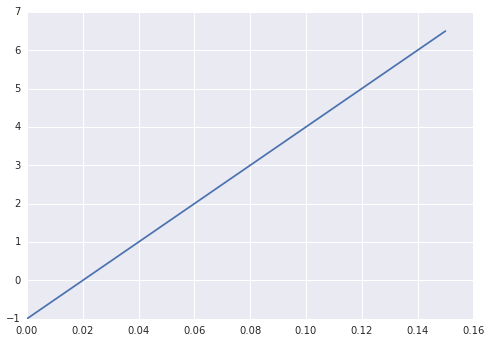

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

params['E(DP)'] = 0.04
params['b'] = 4.
def weights (R_m, b, DP, E_DP, sigma_eps, gamma):
    return (R_m + b * (DP - E_DP)) / (gamma * sigma_eps**2)
x = np.linspace(0, 0.15)
w = [weights(params['R_m'], params['b'], i, params['E(DP)'], params['sigma_m'], 
             params['gamma']) for i in x]
plt.plot(x, w)
res = [weights(params['R_m'], params['b'], i, params['E(DP)'], params['sigma_m'], 
             params['gamma']) for i in [0.02, 0.04, 0.06]]

print('{:.0f} {:.0f} {:.0f}'.format(*[r * 100 for r in res]))

####Question 5
Now, what is the standard error of a regression prediction (the equivalent of $\sigma(E(R))=\sigma(R)/T)$? The answer is

$$\begin{equation*}
E_t(R^e_{t+1})−E(R^e)=b[DP_t−E(DP)] 
\end{equation*}$$
$$\begin{equation*}
\sigma \left[ E_{t}\left( R_{t+1}^{e}\right) -E(R^{e})\right] =\sigma \left( 
\hat{b}\right) \left| DP_{t}-E(DP)\right|
\end{equation*}$$
For $\sigma(\hat{b})$, infer it from $\hat{b}=4$ and $t(\hat{b})=2$, roughly the values in the data.

(Here I am ignoring the uncertainty about the constant or mean return, because we already dealt with that. In a real application, you would add the uncertainty in the constant, i.e.
$$\begin{equation*}
E_{t}\left( R_{t+1}^{e}\right) =a+bDP_{t}
\end{equation*}$$

$$\begin{equation*}
\sigma \left[ E_{t}\left( R_{t+1}^{e}\right) \right] =\sigma (a+bDP_{t})=
\sqrt{\sigma ^{2}(\hat{a})+\sigma ^{2}(\hat{b})DP_{t}^{2}+2cov(\hat{a},\hat{b
})DP_{t}}
\end{equation*}$$
For the rest of this problem treat the mean return as a known constant.)

Using these facts find how parameter uncertainty affects your optimal market-timing portfolio. Include the new weight as a function of DP on your graph. To check your answer, enter new weights at $DP=0.02,\:0.04$ and $0.06$, three numbers, as percents, separated by a space.


In [16]:
params['sigma_b'] = 2.
def weights_regr(R_m, b, DP, E_DP, sigma_eps, sigma_b, gamma):
    return (R_m + b * (DP - E_DP)) / (gamma * (sigma_eps**2 + (sigma_b * (DP - E_DP))**2))

res = [weights_regr(params['R_m'], params['b'], i, params['E(DP)'], params['sigma_m'], 
                    params['sigma_b'],params['gamma']) for i in [0.02, 0.04, 0.06]]

print('{:.0f} {:.0f} {:.4f}'.format(*[r * 100 for r in res]))

0 100 192.3077


####Question 6
What best describes your graph?

/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.x-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family ['Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


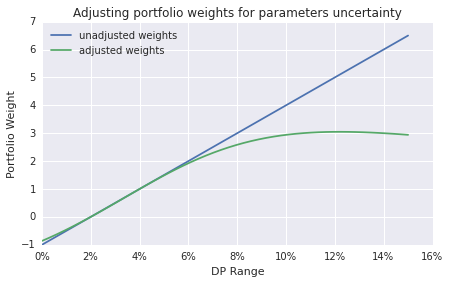

In [9]:
import matplotlib.ticker as mtick

adj_w = [weights_regr(params['R_m'], params['b'], i, params['E(DP)'], params['sigma_m'], 
                      params['sigma_b'],params['gamma']) for i in x]

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

ax.plot(x * 100, w, label='unadjusted weights')
ax.plot(x * 100, adj_w, label='adjusted weights')
# Format the ticks, e.g. '40%'
fmt = '%.0f%%' 
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

plt.xlabel('DP Range')
plt.ylabel('Portfolio Weight')
plt.title('Adjusting portfolio weights for parameters uncertainty')
plt.legend(loc = 'best');

>**Answer: Near the mean $DP=0.04$, the lines are about the same. Paramter uncertainty makes portfolio weights a nonlinear function which has the biggest effects in sharply reducing the portoflio weight for large $DP$ relative to the standard advice. **